In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Read in csv file
input_file = 'resources/Mia_objects_accession_year.csv'
data = pd.read_csv(input_file, index_col='Unnamed: 0')

data.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accession_number,artist,classification,continent,country,creditline,culture,dated,department,id,...,object_name,provenance,room,style,title,RBL,RB,X,loan,accession_year
0,10.1,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c.1888-89,Prints and Drawings,0,...,Drawing,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Air, from the series The Four Elements",NaN,NaN,NaN,NaN,10
1,10.2,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,1,...,Drawing,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Earth, from the series The Four Elements",NaN,NaN,NaN,NaN,10
2,10.3,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,2,...,Drawing,"[Art dealer, London, acquired from ""an old hou...",G352,19th century,"Fire, from the series The Four Elements",NaN,NaN,NaN,NaN,10
3,10.4,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,3,...,Drawing,"[Art dealer, London, acquired from ""an old hou...",Not on View,19th century,"Water, from the series The Four Elements",NaN,NaN,NaN,NaN,10
4,13.29,Walter Shirlaw,Drawings,North America,United States,Gift of Mrs. Florence M. Shirlaw,NaN,19th century,Prints and Drawings,4,...,Drawing,NaN,Not on View,19th century,Montana Indian Reservation I,NaN,NaN,NaN,NaN,13


# Data Visualization

- How many objects are gifted per year
- How many objects are from each country
- See how the number of objects by country changes over time

In [19]:
collection_year = data.groupby(['accession_year'], as_index=False)['accession_number'].count()
collection_year.head()

,accession_year,accession_number
0,6,2
1,8,2
2,9,105
3,10,5
4,11,2


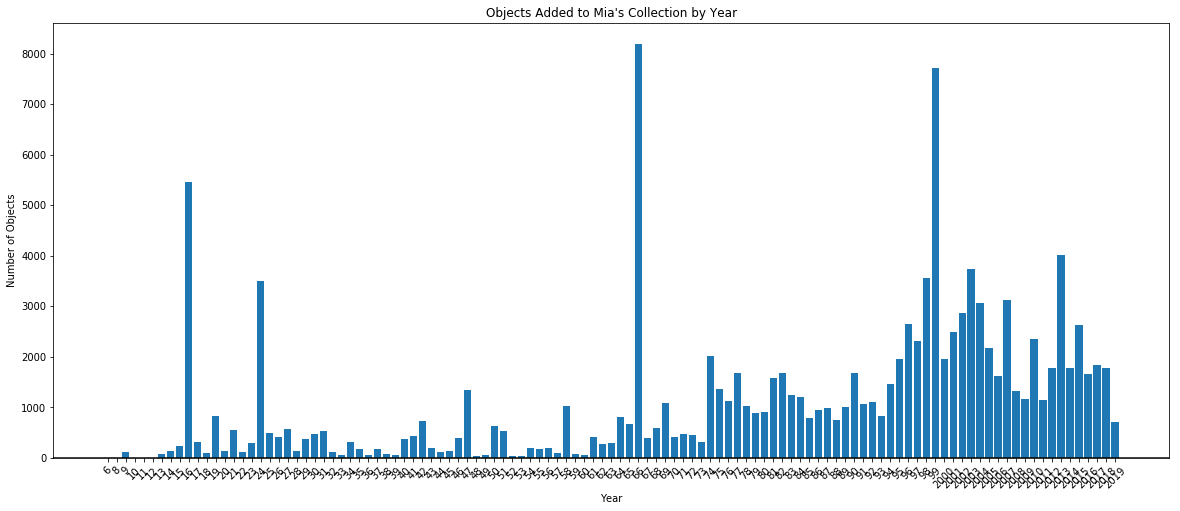

In [49]:
# Create handles from accession_year values
handles = collection_year['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, collection_year['accession_number'])
plt.axhline(color="black")
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()

In [20]:
collection_country = data.groupby(['country'], as_index=False)['accession_number'].count()
collection_country.head()

,country,accession_number
0,Admiralty Islands,2
1,Afghanistan,58
2,Afghanistan or Pakistan,1
3,Afghanistan or Uzbekistan,1
4,Africa,5


In [44]:
# Pull top 100 countries to chart
collection_country_top = collection_country.nlargest(50, 'accession_number')
collection_country_top.head()

,country,accession_number
464,United States,35943
143,France,17749
249,Japan,11218
65,China,9866
113,England,8550


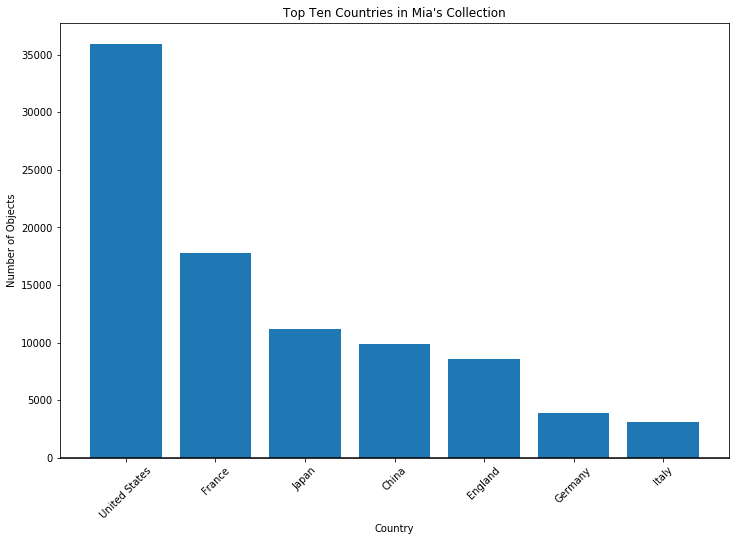

In [51]:
# Create handles from country values
handles = collection_country_top['country'].values

# Only pull top 7 values
# Build the bar chart
plt.figure(figsize=(12,8))
x_axis = np.arange(0,7)

plt.bar(x_axis, collection_country_top['accession_number'][0:7])
plt.axhline(color="black")
plt.xticks(x_axis, labels=handles[0:7], rotation=45)
plt.title("Top Ten Countries in Mia's Collection")
plt.xlabel("Country")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()

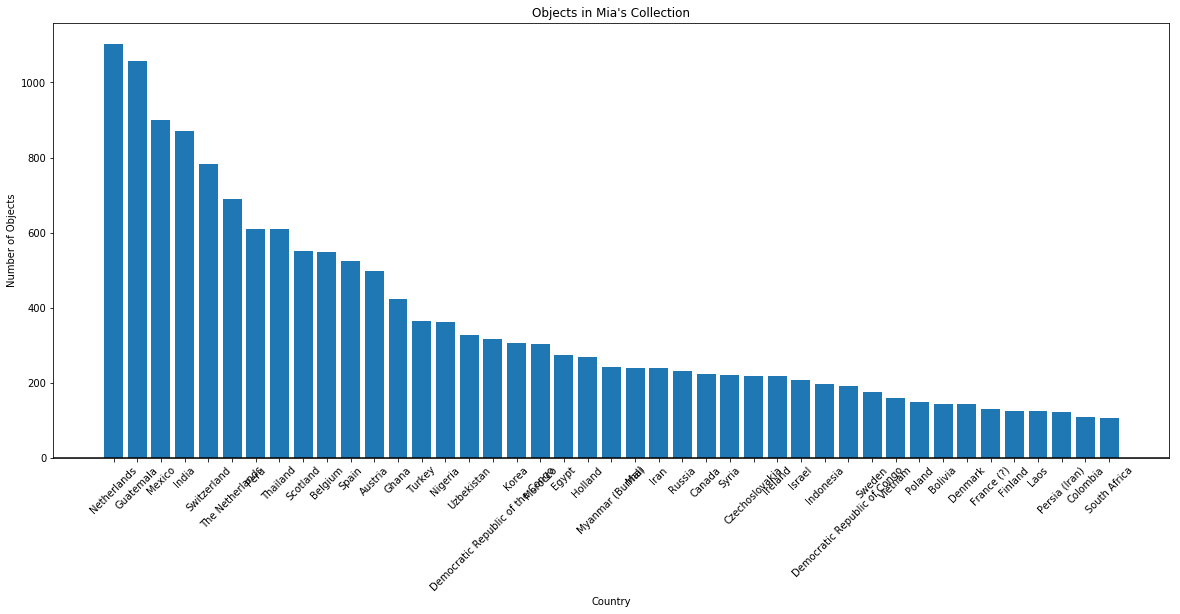

In [53]:
# Create handles from country values
handles = collection_country_top['country'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,43)

plt.bar(x_axis, collection_country_top['accession_number'][7:50])
plt.axhline(color="black")
plt.xticks(x_axis, labels=handles[7:50], rotation=45)
plt.title("Objects in Mia's Collection")
plt.xlabel("Country")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()